In [2]:
#fetch data and add headers
import pandas as pd
filepath = 'promise_CM1.csv'
column = ["loc","v(g)","ev(g)","ev(g)","n","v","l","d","i","e","b","t",
          "loCode","loComment","loBlank","locCodeAndComment","uniq_Op",
          "uniq_Opnd","total_Op","total_Opnd","branchCount","defects"]
df = pd.read_csv(filepath, names=column)

,loc,v(g),ev(g),ev(g),n,v,l,d,i,e,...,loCode,loComment,loBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,1.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,4.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,6.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
5,24.0,6.0,6.0,6.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
6,7.0,1.0,1.0,1.0,11.0,34.87,0.50,2.00,17.43,69.74,...,0,0,1,0,4.0,5.0,6.0,5.0,1.0,False
7,12.0,2.0,1.0,1.0,23.0,94.01,0.16,6.43,14.62,604.36,...,0,0,7,0,10.0,7.0,14.0,9.0,3.0,False
8,25.0,5.0,5.0,5.0,107.0,548.83,0.07,14.25,38.51,7820.87,...,12,16,13,0,15.0,20.0,69.0,38.0,9.0,False
9,46.0,15.0,3.0,3.0,239.0,1362.41,0.04,22.30,61.10,30377.95,...,8,35,22,0,15.0,37.0,129.0,110.0,29.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
loc                  498 non-null float64
v(g)                 498 non-null float64
ev(g)                498 non-null float64
ev(g).1              498 non-null float64
n                    498 non-null float64
v                    498 non-null float64
l                    498 non-null float64
d                    498 non-null float64
i                    498 non-null float64
e                    498 non-null float64
b                    498 non-null float64
t                    498 non-null float64
loCode               498 non-null int64
loComment            498 non-null int64
loBlank              498 non-null int64
locCodeAndComment    498 non-null int64
uniq_Op              498 non-null float64
uniq_Opnd            498 non-null float64
total_Op             498 non-null float64
total_Opnd           498 non-null float64
branchCount          498 non-null float64
defects              

In [5]:
X = df.iloc[:,0:-1] #features
y = df.iloc[:,-1] #labels

In [6]:
#divide dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# model for Gausian NB

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(X_train, y_train)

In [8]:
#predict model on test data
predicted = gnb.predict(X_test)

In [9]:
#get accuracy, precision, recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_score = accuracy_score(y_test,predicted)
precision_score = precision_score(y_test,predicted)
recall_score = recall_score(y_test,predicted)
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("Recall:",recall_score)

Accuracy: 0.848484848485
Precision: 0.181818181818
Recall: 0.111111111111


In [16]:
#APPROACH 2 - split data - separate columns into features and labels, then split as 70:30
#X_train, X_test, y_train, y_test = train_test_split(df, defect_encoded, test_size=0.3, random_state=int(time.time()))

#k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[:,0:-1], df.iloc[:,0:-1]
    y_train, y_test = df.iloc[:,-1], df.iloc[:,-1]

In [17]:
#Create a Gaussian Classifier
gnb2 = GaussianNB().fit(X_train, y_train)

#Predict the response for test dataset
pred = gnb2.predict(X_test)

#get accuracy, precision, recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_score = accuracy_score(y_test,pred)
precision_score = precision_score(y_test,pred)
recall_score = recall_score(y_test,pred)
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("Recall:",recall_score)

Accuracy: 0.855421686747
Precision: 0.274509803922
Recall: 0.285714285714


In [46]:
#APPROACH 3 - FEATURE SELECTION (Univariate Selection)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:-1] #features
y = df.iloc[:,-1] #labels

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['metrics','defects']  #naming the dataframe columns
print(featureScores.nlargest(10,'defects'))  #print 10 best features

       metrics       defects
9            e  2.452055e+06
11           t  1.362269e+05
5            v  6.738725e+04
4            n  7.729164e+03
18    total_Op  4.690829e+03
19  total_Opnd  3.040284e+03
13   loComment  2.454622e+03
0          loc  1.861531e+03
17   uniq_Opnd  1.537476e+03
8            i  1.268298e+03


[ 0.04255493  0.04335628  0.03019787  0.03594042  0.04197471  0.04171948
  0.050605    0.05944662  0.06237055  0.06068703  0.04842783  0.03867296
  0.04761438  0.10130794  0.05102029  0.00527601  0.08698331  0.03817249
  0.03053835  0.04283252  0.04030106]


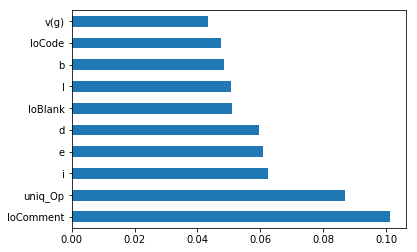

In [25]:
#APPROACH 3 - FEATURE SELECTION (Feature Importance)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [59]:
from sklearn.naive_bayes import GaussianNB

# features = ["v(g)","l","d","i","e","b",
#           "loCode","loComment","loBlank","uniq_Op"]

features = ["e","t","v","n","total_Op","total_Opnd","loComment","loc","uniq_Opnd","i"]

X = df[features] #features
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gnb = GaussianNB().fit(X_train, y_train)

In [60]:
predicted = gnb.predict(X_test)

In [61]:
#get accuracy, precision, recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_score = accuracy_score(y_test,predicted)
precision_score = precision_score(y_test,predicted)
recall_score = recall_score(y_test,predicted)
print("Accuracy:",accuracy_score)
print("Precision:",precision_score)
print("Recall:",recall_score)

Accuracy: 0.848484848485
Precision: 0.181818181818
Recall: 0.111111111111


In [30]:
from sklearn.feature_selection import VarianceThreshold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

21

In [34]:
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)

X_train.shape, X_test.shape

((333, 21), (165, 21))

In [39]:
# Chi-Squared statistical test

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[  1.862e+03   1.789e+02   2.948e+01   1.727e+02   7.729e+03   6.739e+04
   1.515e+00   2.087e+02   1.268e+03   2.452e+06   2.420e+01   1.362e+05
   3.771e+01   2.455e+03   5.181e+02   1.867e+00   1.879e+02   1.537e+03
   4.691e+03   3.040e+03   3.477e+02]
[[  1.300e+00   1.300e+00   1.300e+00   1.300e+00]
 [  1.000e+00   1.000e+00   1.000e+00   1.000e+00]
 [  6.300e+01   3.091e+02   2.937e+03   1.632e+02]
 [  4.700e+01   2.155e+02   3.448e+03   1.916e+02]
 [  7.200e+01   3.461e+02   6.000e+03   3.333e+02]]


In [41]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))


Num Features: 3


In [69]:
#exhaustive 
#train_features, test_features, train_labels, test_labels
#X_train, X_test, y_train, y_test
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
           min_features=2,
           max_features=4,
           scoring='roc_auc',
           print_progress=True,
           cv=2)

In [70]:
features = feature_selector.fit(np.array(X_train.fillna(0)), y_train)

Features: 375/375

In [76]:
filtered_features= X_train.columns[list(features.k_feature_idx_)]
filtered_features

AttributeError: 'ExhaustiveFeatureSelector' object has no attribute 'k_feature_idx_'

In [74]:
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train[filtered_features].fillna(0), y_test)

train_pred = clf.predict_proba(X_train[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(y_test, train_pred[:,1])))

test_pred = clf.predict_proba(X_test[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_pred [:,1])))

NameError: name 'filtered_features' is not defined